In [2]:
from pathlib import Path
import sys

sys.path.insert(0, str(Path().absolute().parent))

In [2]:
import numpy as np
import pandas as pd

import h5py

In [3]:
from settings import PATH, SETTINGS

In [4]:
TRAIN_PATH = PATH['data']['origin']['train']
TRAIN_DATA = list(TRAIN_PATH.glob('*.hdf5'))
TRAIN_MARKS = TRAIN_PATH / SETTINGS['labels_file_name']

In [5]:
def h5_tree(val, pre=''):
    items = len(val)
    for key, val in val.items():
        items -= 1
        if items == 0:
            # the last item
            if type(val) == h5py._hl.group.Group:
                print(pre + '└── ' + key)
                h5_tree(val, pre+'    ')
            else:
                print(pre + '└── ' + key + ' (%d)' % len(val))
        else:
            if type(val) == h5py._hl.group.Group:
                print(pre + '├── ' + key)
                h5_tree(val, pre+'│   ')
            else:
                print(pre + '├── ' + key + ' (%d)' % len(val))

In [6]:
%%time
# замер времени на раскопки в структуре
# и показ структуры файла
with h5py.File(TRAIN_DATA[0], 'r') as hf:
    print(hf)
    h5_tree(hf)

<HDF5 file "001121a05.hdf5" (mode r)>
└── 001121a05
    ├── H1
    │   ├── SFTs (360)
    │   └── timestamps_GPS (4612)
    ├── L1
    │   ├── SFTs (360)
    │   └── timestamps_GPS (4653)
    └── frequency_Hz (360)
Wall time: 53 ms


In [7]:
def read(file_name):
    with h5py.File(TRAIN_DATA[0], 'r') as hf:
        key = list(hf.keys())[0]
        dfs = []
        for subkey in ('H1', 'L1'):
            df = pd.DataFrame(hf[key][subkey]['SFTs'], index=hf[key]['frequency_Hz'], columns=hf[key][subkey]['timestamps_GPS'])
            df = df.T
            df.name = key
            dfs.append(df)
    return dfs

In [8]:
%%time
# замер времени на считывание одного файла
dfs = read(TRAIN_DATA[0])

Wall time: 1.27 s


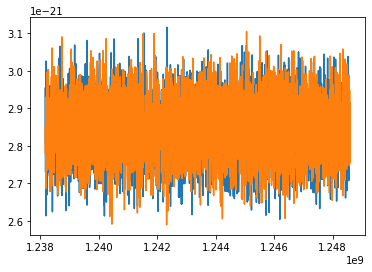

In [9]:
# график корня суммы квадратов амплитуд разных частот
for df in dfs:
    ((df.abs() ** 2).sum(axis=1) ** 0.5).plot()

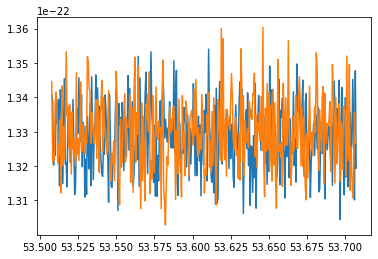

In [10]:
# график средней амплитуды одной частоты
for df in dfs:
    (df.abs().mean()).plot()